In [1]:
from quantile_regression.linear_quantile import LinearVectorQuantileRegression
from old_source_code.data import create_joint_x_y
import torch
from utils import TrainParams

X, Y = create_joint_x_y(1000)
X_dataset = torch.from_numpy(X)
Y_dataset = torch.from_numpy(Y)
device_and_dtype_specifications = dict(
    dtype=torch.float64,
    device=torch.device("cpu")
)

X_dataset = X_dataset.to(**device_and_dtype_specifications)
Y_dataset = Y_dataset.to(**device_and_dtype_specifications)

dataloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_dataset, Y_dataset), batch_size=256, shuffle=True)
train_params = TrainParams(verbose=True)

lvqr = LinearVectorQuantileRegression(num_latent_points_to_generate=600)
_ = lvqr.fit(dataloader)

# to save the model:
# lvqr.save("lvqr.pth")s

# to load the model:
# _ = lvqr.load("lvqr.pth")

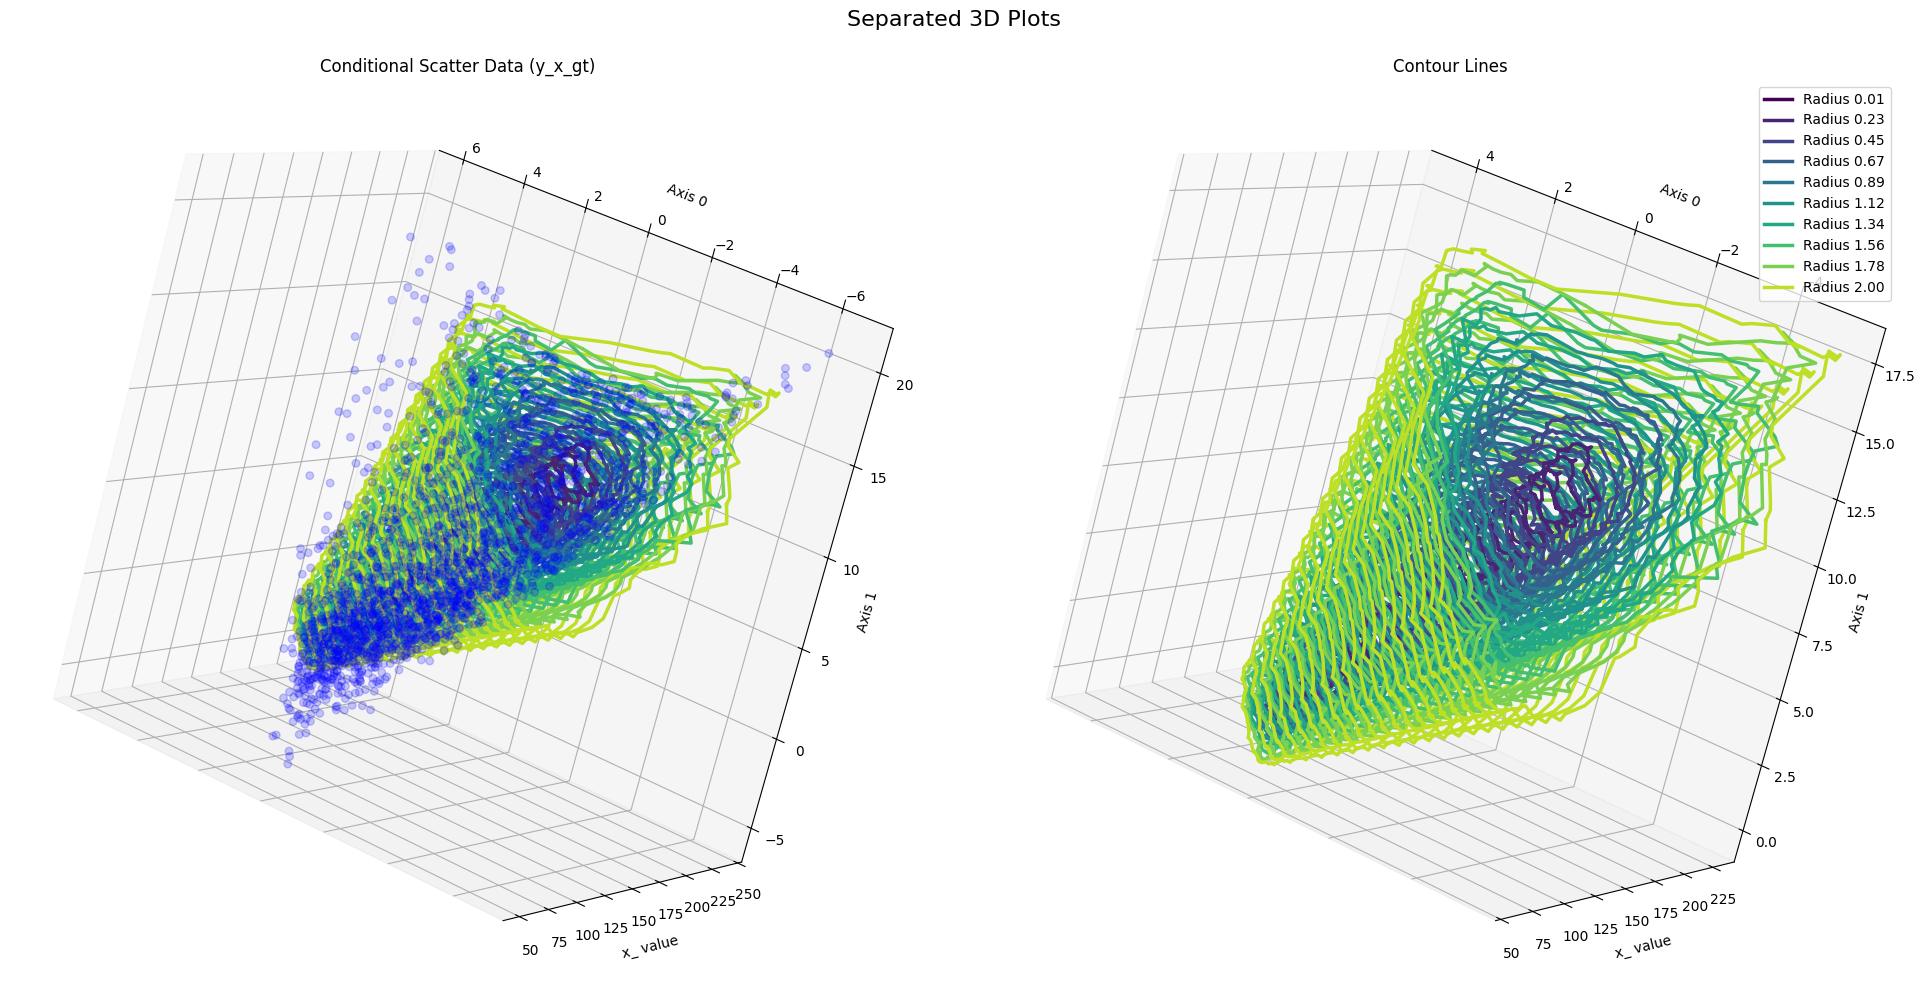

In [2]:
%matplotlib inline
from utils import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(model=lvqr, device_and_dtype_specifications=device_and_dtype_specifications)